In [ ]:
# refernce
# https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
import sklearn
import shap

In [ ]:
X,y = shap.datasets.california(n_points=1000)

In [ ]:
model = sklearn.linear_model.LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
X100 = shap.utils.sample(X,100)

In [ ]:
explainer = shap.Explainer(model.predict,X100)
shap_values = explainer(X)

ExactExplainer explainer: 1001it [00:10,  6.57it/s]                          


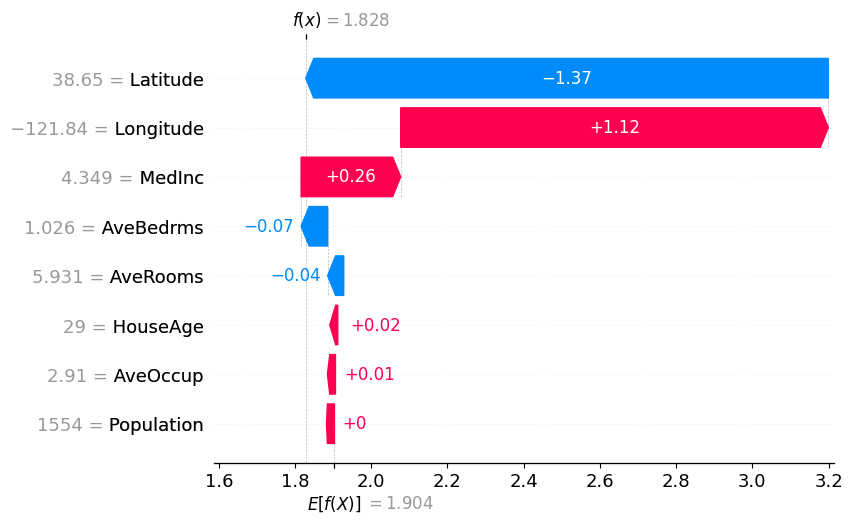

In [ ]:
shap.plots.waterfall(shap_values[2],max_display=14)

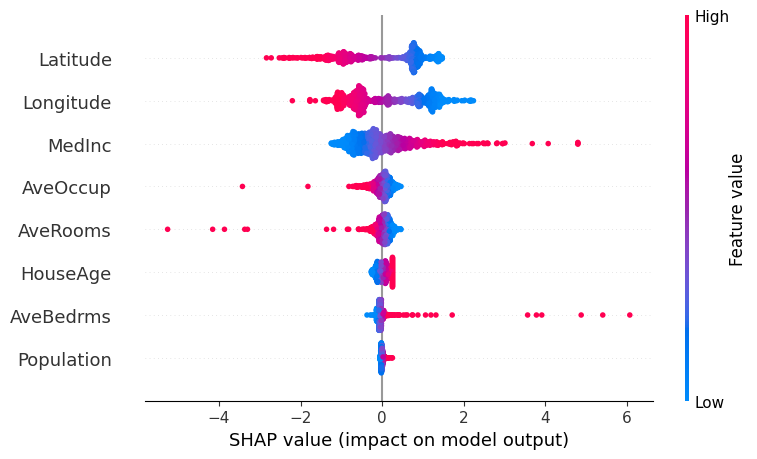

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
# boosting model explainable
import xgboost


In [ ]:
model = xgboost.XGBRegressor(n_estimators=100,max_depth=2)

In [ ]:
model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
explainer_xgb = shap.Explainer(model,X100)
shap_value=explainer_xgb(X)

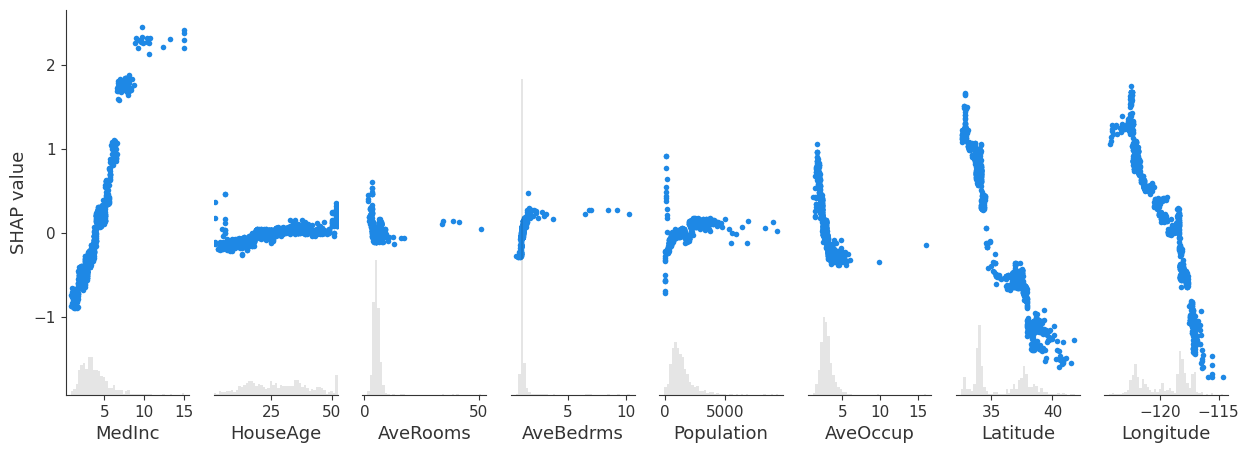

In [ ]:
shap.plots.scatter(shap_value)

In [ ]:
# Explaining a linear logistic regression model

In [ ]:
X_adult,y_adult = shap.datasets.adult()

In [ ]:
model_adult = sklearn.linear_model.LogisticRegression(max_iter=1000)


In [ ]:
model_adult.fit(X_adult,y_adult)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# SHAP explainer
X100 = shap.utils.sample(X_adult,100)
explainer = shap.LinearExplainer(model_adult,X100)

In [ ]:
shap_value = explainer(X_adult)

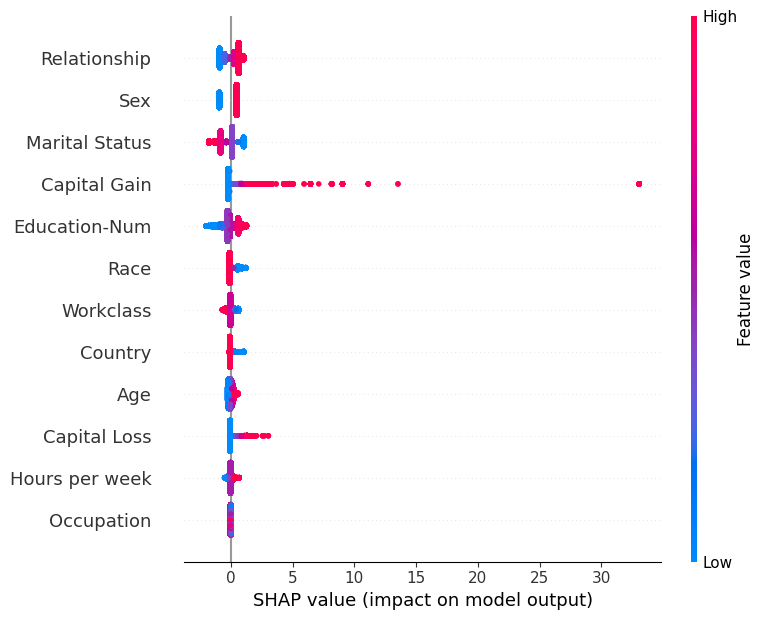

In [ ]:
shap.summary_plot(shap_value,X_adult)

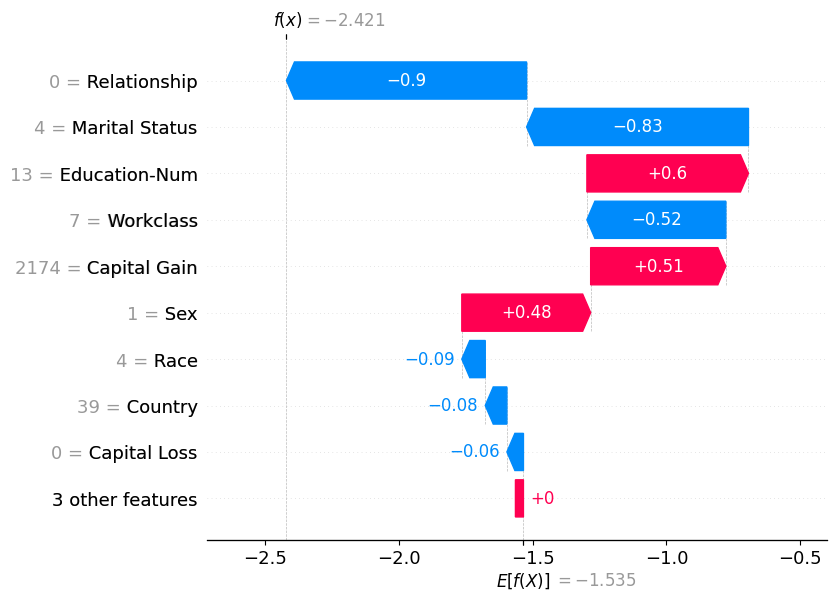

In [ ]:
shap.plots.waterfall(shap_value[0])

In [ ]:
import xgboost

In [ ]:
model = xgboost.XGBClassifier(n_estimators=100,max_depth=2,eval_metric='logloss')

In [ ]:
model.fit(X_adult,y_adult)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
background_adult = shap.maskers.Independent(X_adult, max_samples=100)


In [ ]:
explainer = shap.Explainer(model,background_adult)

In [ ]:
shap_values = explainer(X_adult)

 99%|===================| 32154/32561 [00:24<00:00]       